In [1]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2, 3, 1, 1], grid=3, k=3, seed=42, device=device)

cuda
checkpoint directory created: ./model
saving model version 0.0


In [10]:
from kan.utils import create_dataset
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

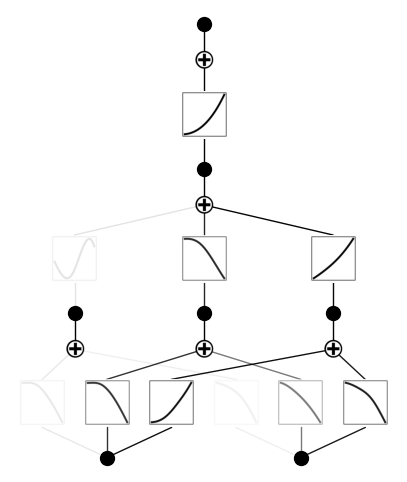

In [3]:
# plot KAN at initialization
model(dataset['train_input'])
model.plot()

In [4]:
# train the model
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 4.27e-01 | test_loss: 4.00e-01 | reg: 1.53e+01 | : 100%|█| 50/50 [00:26<00:00,  1.89it

saving model version 0.1


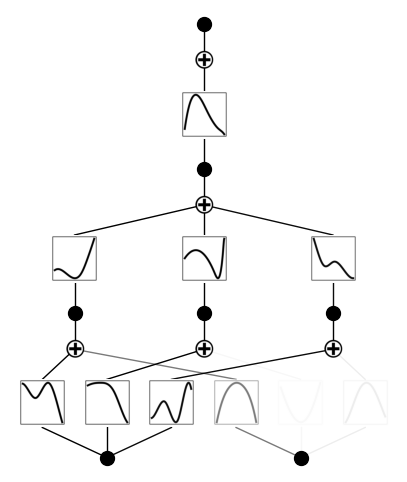

In [5]:
model.plot()

saving model version 0.2


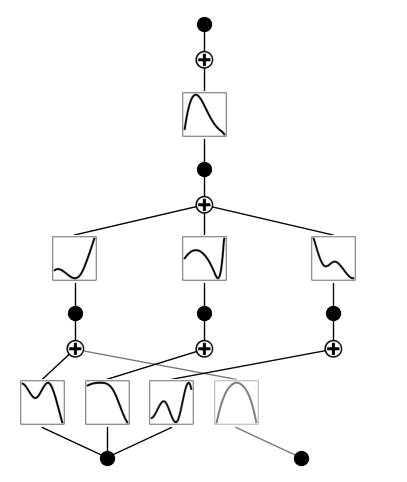

In [6]:
model = model.prune()
model.plot()

In [7]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)


fixing (0,0,0) with x, r2=0.22586250561710733, c=1
fixing (0,0,1) with x^2, r2=0.9889607578248474, c=2
fixing (0,0,2) with x, r2=0.23847997647576766, c=1
fixing (0,1,0) with x^2, r2=0.9942847313551454, c=2
fixing (0,1,1) with 0
fixing (0,1,2) with 0
fixing (1,0,0) with x^2, r2=0.9863015280020954, c=2
fixing (1,1,0) with x, r2=0.026665554950178826, c=1
fixing (1,2,0) with x, r2=0.7435301126135769, c=1
fixing (2,0,0) with x, r2=0.45472760180274446, c=1
saving model version 0.3


In [8]:
from kan.utils import ex_round
ex_round(model.symbolic_formula()[0][0],4)

0.4244*x_1 + 0.0043*(-9.9998*x_1 - 4.276)**2 - 0.1709*(1.3897*x_1 + 0.99029541015625*x_2**2 - 2.6707)**2 + 3.1072

In [9]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 8.86e-01 | test_loss: 8.45e-01 | reg: 0.00e+00 | : 100%|█| 50/50 [00:30<00:00,  1.63it

saving model version 0.4


In [11]:
from kan.utils import ex_round
ex_round(model.symbolic_formula()[0][0],4)

1.0*exp(1.00000723122563*x_2**2 + 1.0*sin(3.1416*x_1))